In [392]:
import pandas as pd
import numpy as np
from astropy.io import fits
import seaborn as sns
import matplotlib.pyplot as plt
path ='/Users/patito/Documents/topicos/topicos/ModuloII/dolphot2.0/fits'

In [393]:
columns = pd.read_table(path+'/f814/j9ec41aiq_flc_dolphot.columns', header=0)
#if is necessary read, just print columns
lista=[]
for i in columns['#']:
    lista.append(i)


### f814

In [394]:
df_aiq_flc = pd.read_fwf(path+'/f814/j9ec41aiq_flc_dolphot', names=lista)
filters_814 = df_aiq_flc[(df_aiq_flc['28. Photometry quality flag, j9ec41aiq_flc (355.0 sec)'] <= 2) & (df_aiq_flc['11. Object type (1=bright star, 2=faint, 3=elongated, 4=hot pixel, 5=extended)']==1)]

In [395]:
sharpness_814 = filters_814['20. Sharpness, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
crowding_814 = filters_814['22. Crowding, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
signal_814 = filters_814['19. Signal-to-noise, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
mags_814 = filters_814['16. Instrumental magnitude, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
pos_x_814 = filters_814['3. Object X position on reference image (or first image, if no reference)'].reset_index(drop=True)
pos_y_814 = filters_814['4. Object Y position on reference image (or first image, if no reference)'].reset_index(drop=True)

In [396]:
#ahora toca ver que es cull3 sparse field: hay que tener los datos para las dos para poder ahcerlo

### f606


In [397]:
df_agq_flc = pd.read_fwf(path+'/f606/j9ec41agq_flc_dolphot', names=lista)

In [398]:
filters_606 = df_agq_flc[(df_agq_flc['28. Photometry quality flag, j9ec41aiq_flc (355.0 sec)'] <= 2) & (df_agq_flc['11. Object type (1=bright star, 2=faint, 3=elongated, 4=hot pixel, 5=extended)'] == 1)]

In [399]:
sharpness_606 = filters_606['7. Object sharpness'].reset_index(drop=True)
crowding_606 = filters_606['10. Crowding'].reset_index(drop=True)
signal_606 = filters_606['6. Signal-to-noise'].reset_index(drop=True)
mags_606 = filters_606['16. Instrumental magnitude, j9ec41aiq_flc (355.0 sec)'].reset_index(drop=True)
pos_x_606 = filters_606['3. Object X position on reference image (or first image, if no reference)'].reset_index(drop=True)
pos_y_606 = filters_606['4. Object Y position on reference image (or first image, if no reference)'].reset_index(drop=True)


### Culls

In [400]:
data_dict= {
    'sharpness_606' : sharpness_606,
    'crowding_606' : crowding_606,
    'signal_606' : signal_606,
    'mags_606' : mags_606,
    'pos_x_606': pos_x_606,
    'pos_y_606' : pos_y_606,
    'sharpness_814': sharpness_814,
    'crowding_814': crowding_814,
    'signal_814' : signal_814,
    'mags_814': mags_814,
    'pos_x_814' : pos_x_814,
    'pos_y_814' : pos_y_814
}

In [401]:
data_culls = pd.DataFrame.from_dict(data_dict, dtype=float)

In [402]:
#position match
tresh = 80 
match = data_culls[(data_culls['pos_y_606'] > data_culls['pos_y_814']-tresh) & (data_culls['pos_y_606'] < data_culls['pos_y_814']+tresh)]
match = match[(data_culls['signal_606']>5) & (data_culls['signal_814']>5)]

/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/2276610655.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  match = match[(data_culls['signal_606']>5) & (data_culls['signal_814']>5)]


In [403]:
sharp_sum = match['sharpness_606'] + match['sharpness_814']
crowd_sum = match['crowding_606'] + match['crowding_814']

match['sharp_sum'] = sharp_sum
match['crowd_sum'] = crowd_sum

In [404]:
sharp_match = match[(match['sharp_sum']>-0.06) & (match['sharp_sum']<1.30)]

final_match = sharp_match[(sharp_match['crowd_sum']<0.16)]

In [405]:
import pandas as pd

# Suponiendo que tienes un DataFrame 'final_match' con las magnitudes observadas
# en las columnas 'mags_606' y 'mags_814'
# Ejemplo:
# df = pd.DataFrame({
#     'mags_606': [20.1, 21.3, 19.8],
#     'mags_814': [19.5, 20.0, 18.9]
# })

# Coeficientes de extinción para los filtros F606W y F814W
A_F606W = 0.198
A_F814W = 0.122

# Función para corregir la magnitud por extinción
def corregir_extincion(mag_observada, A_lambda):
    return mag_observada - A_lambda

# Aplicar la corrección a las columnas del DataFrame
final_match['mags_606_corregida'] = final_match['mags_606'].apply(corregir_extincion, A_lambda=A_F606W)
final_match['mags_814_corregida'] = final_match['mags_814'].apply(corregir_extincion, A_lambda=A_F814W)

# Mostrar el DataFrame con las columnas corregidas
print(final_match)


/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/381427938.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match['mags_606_corregida'] = final_match['mags_606'].apply(corregir_extincion, A_lambda=A_F606W)
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/381427938.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match['mags_814_corregida'] = final_match['mags_814'].apply(corregir_extincion, A_lambda=A_F814W)


      sharpness_606  crowding_606  signal_606  mags_606  pos_x_606  pos_y_606  \
11            0.099         0.000        71.3    21.421    3021.94     245.68   
27            0.061         0.010        49.7    22.064    2058.20       4.99   
40            0.098         0.007        42.0    22.302     866.03     560.65   
43            0.060         0.000        41.2    22.405     685.24    1912.67   
64            0.131         0.000        34.6    22.679    1400.73    1058.69   
...             ...           ...         ...       ...        ...        ...   
8925          0.156         0.018         5.5    25.283    3805.37     983.22   
8936          0.276         0.000         5.8    25.202    2644.73     751.17   
9030          0.196         0.015         5.4    25.312    2122.54     268.45   
9179          0.142         0.021         5.1    25.320    1038.72     218.64   
9275          0.212         0.070         5.6    25.263    2793.67    1251.68   

      sharpness_814  crowdi

In [406]:
final_match['color'] = final_match['mags_606_corregida'] - final_match['mags_814_corregida']

plotdata = pd.DataFrame(final_match[columns:=['mags_814_corregida', 'color']])

/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/3443789683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_match['color'] = final_match['mags_606_corregida'] - final_match['mags_814_corregida']


In [407]:
plotdata

,mags_814_corregida,color
11,21.143,0.080
27,21.974,-0.108
40,22.211,-0.107
43,22.337,-0.130
64,22.631,-0.150
...,...,...
8925,25.091,-0.006
8936,25.131,-0.127
9030,25.178,-0.064
9179,25.192,-0.070


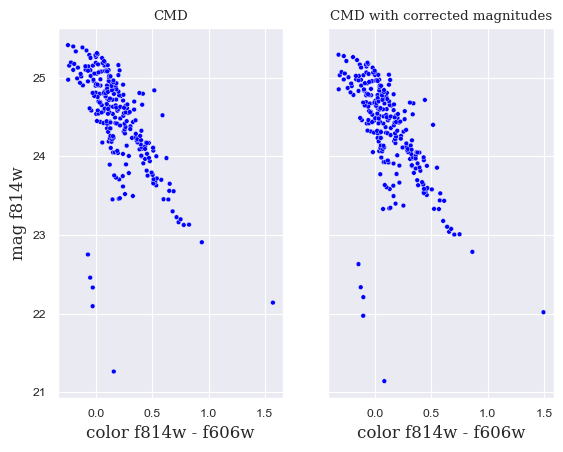

In [408]:
fig, ax = plt.subplots(1,2, sharey=True)
sns.set_theme('paper', style='darkgrid')

sns.scatterplot(ax= ax[0], y=final_match['mags_814'],x=final_match['mags_606']-final_match['mags_814'], size=1,
                color='blue', legend=False)
ax[0].set_xlabel('color f814w - f606w', fontfamily='serif', fontsize=12)
ax[0].set_ylabel('mag f814w', fontfamily='serif', fontsize=12)
#ax[0].set_xlim(26,21)
ax[0].set_title('CMD', fontfamily='serif')

sns.scatterplot(ax= ax[1], y=final_match['mags_814_corregida'],
                x=plotdata['color'], 
                size=1, color='blue', legend=False)
#ax[1].set_ylabel(' ', fontfamily='serif', fontsize=12)
ax[1].set_xlabel('color f814w - f606w', fontfamily='serif', fontsize=12)
#ax[1].set_xlim(26,21)
ax[1].set_title('CMD with corrected magnitudes', fontfamily='serif')
fig.savefig('CMDs.jpg',dpi=350)
plt.show()



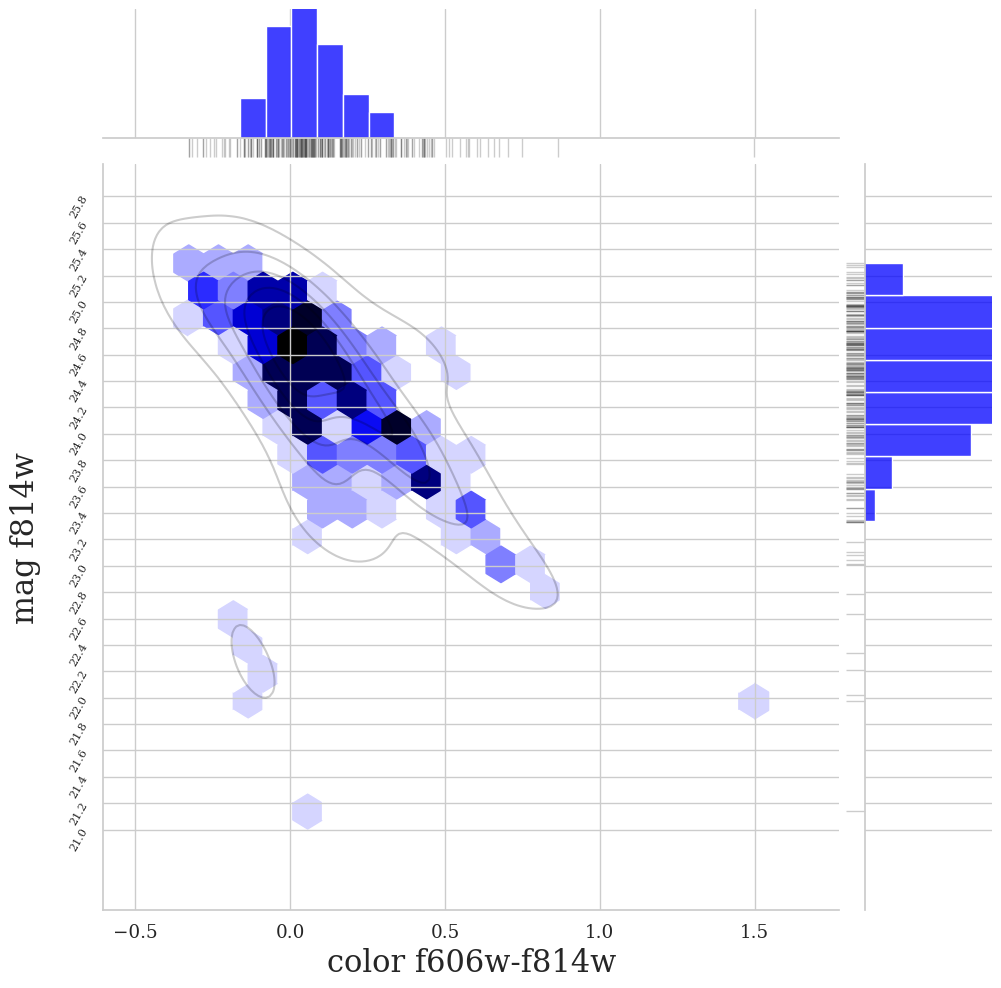

In [409]:
sns.set_theme(style='whitegrid', context='notebook', font_scale=1.2, font='serif')
ax = sns.jointplot(data=plotdata, x='color', y='mags_814_corregida', color='blue', 
                 kind='hex', zorder=0, height=10, )
ax.plot_joint(sns.kdeplot, color="black", zorder=1, levels=6, alpha=0.2)
ax.plot_marginals(sns.rugplot, color="black", height=-.15, clip_on=False, alpha=0.2)
#plt.xlim(26,21)
plt.yticks(np.arange(21, 26, 0.2), rotation=60, fontsize=8)
plt.ylabel('mag f814w', fontsize=22, labelpad=20)
plt.xlabel('color f606w-f814w', fontsize=22)
plt.savefig('trgbestimation.jpg', dpi=300)
plt.show()
# estimamos el TRGB en 24.8  en base a lo observado en la distribucion de las estrellas

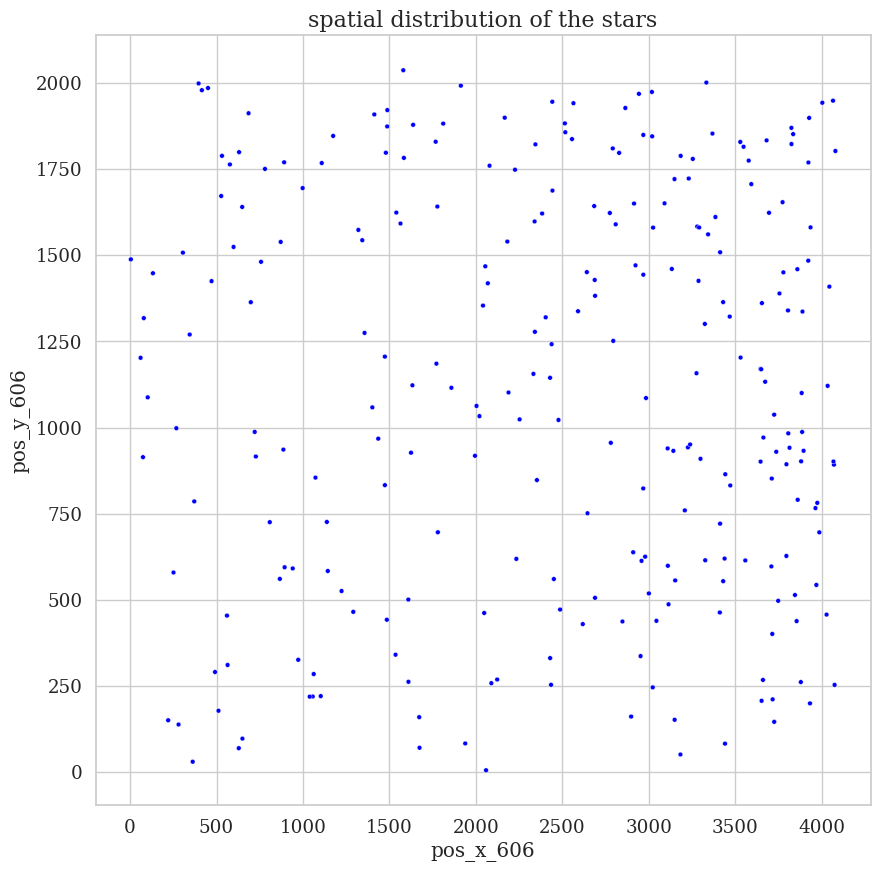

In [410]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.set_theme('paper', style='darkgrid')

sns.scatterplot(x=final_match['pos_x_606'],y=final_match['pos_y_606'], size=1,
                color='blue', legend=False)
ax.set_title('spatial distribution of the stars', fontfamily='serif', fontsize=16)
fig.savefig('spatialdistribution.jpg', dpi=350)
plt.show()

In [432]:
iso_2 = pd.read_csv('10500z0000100y247P00O0D0E0.isc_acs', comment='#', delim_whitespace=True)

iso_3 = pd.read_csv('10500z0390500y298P00O0D0E0.isc_acs', comment= '#', delim_whitespace=True)
"""
iso_4 = pd.read_csv('10000z0009900y248P00O0D0E0.isc_acs', comment='#', delim_whitespace=True)
"""
iso_5 = pd.read_csv('10500z0009900y248P00O0D0E0.isc_acs', comment= '#',delim_whitespace=True)


/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/610199012.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  iso_2 = pd.read_csv('10500z0000100y247P00O0D0E0.isc_acs', comment='#', delim_whitespace=True)
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/610199012.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  iso_3 = pd.read_csv('10500z0390500y298P00O0D0E0.isc_acs', comment= '#', delim_whitespace=True)
/var/folders/_3/b44zg9zx3mjcpbfyw4_4d15c0000gn/T/ipykernel_71481/610199012.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  iso_5 = pd.read_csv('10500z0009900y248P00O0D0E0.isc_acs', comment= '#',delim_whitespace=True)


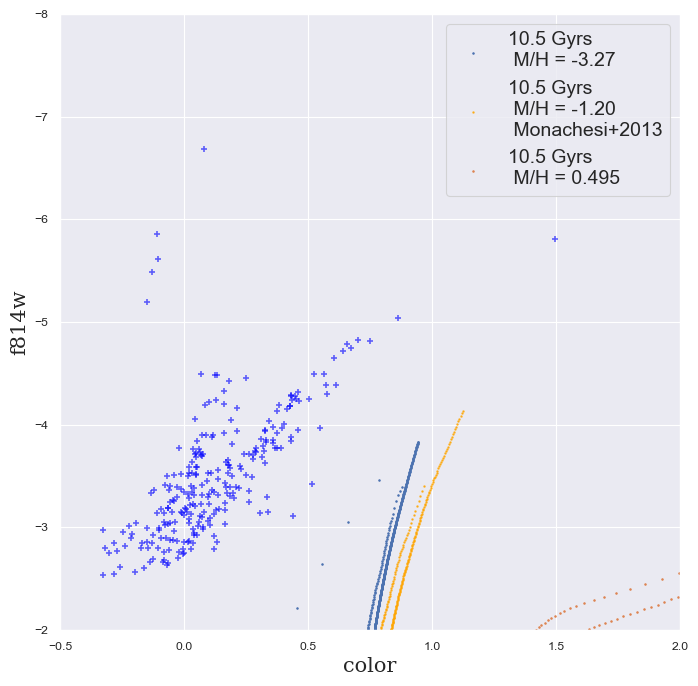

In [455]:
color = plotdata['color']
m = plotdata['mags_814_corregida']
mags = m-5*np.log10(3675000)+5
magserrorpls = m-5*np.log10(3675000 + 49000)+5
magserrormin = m-5*np.log10(3675000 - 49000)+5

plt.figure(figsize=(8, 8))
plt.scatter(x=color, y=mags, marker='+', color='blue', alpha=0.6)
plt.scatter(iso_2['F606W']-iso_2['F814W'], iso_2['F814W'], s=1, label='10.5 Gyrs \n M/H = -3.27')
plt.scatter(iso_5['F606W']-iso_5['F814W'], iso_5['F814W'], s=1, label='10.5 Gyrs \n M/H = -1.20 \n Monachesi+2013', color='orange', alpha=0.7)
plt.scatter(iso_3['F606W']-iso_3['F814W'], iso_3['F814W'], s=1, label='10.5 Gyrs \n M/H = 0.495')
#plt.errorbar(x=color, y=mags, xlolims=magserrormin, xuplims=magserrorpls)


plt.legend(fontsize=14)
plt.ylim(-2,-8)
plt.xlim(-0.5,2)
plt.xlabel('color', fontsize=15, fontfamily='serif')
plt.ylabel('f814w', fontsize=15, fontfamily='serif')

plt.savefig('ischrone.jpg', dpi=350)
plt.show()

In [500]:
image_data = fits.getdata('/Users/patito/Documents/topicos/topicos/ModuloII/dolphot2.0/fits/f606/j9ec41agq_flc.fits')

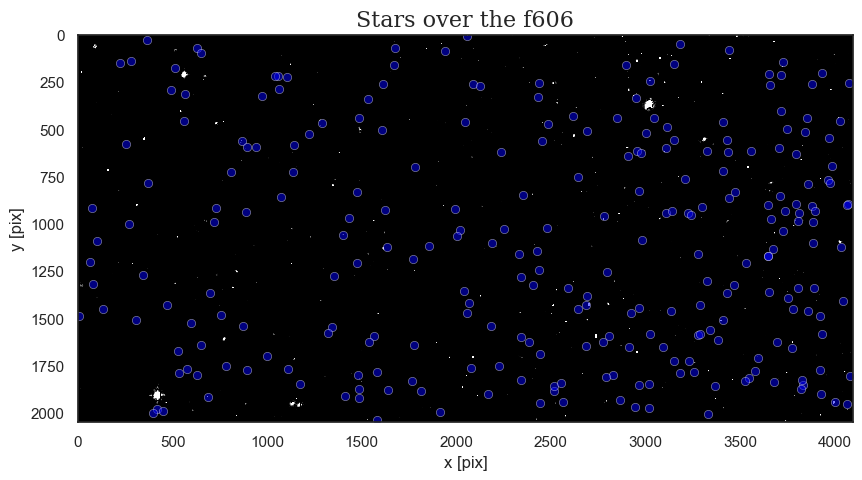

In [538]:
from matplotlib.colors import PowerNorm
fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.set_theme(style='white')

ax.imshow(image_data, cmap='gray', norm=PowerNorm(gamma=1, vmax=80, vmin=40))
sns.scatterplot(x=final_match['pos_x_606'],y=final_match['pos_y_606'],
                markers='*', color='blue', legend=False, alpha=0.5)
ax.set_title('Stars over the f606', fontfamily='serif', fontsize=16)
ax.set_xlabel('x [pix]')
ax.set_ylabel('y [pix]')
ax.grid(False)
fig.savefig('starsoverthefieldof606.jpg', dpi=350)
plt.show()
